<h1><b>DENGUE ANALYTICS</b></h1>

<hr>

<h3>Analyst : <b>Junelle C. Dinglasan</b></h3>

In [85]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [86]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [87]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h3><b>Descriptive Analytics</b></h3>

In [88]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


<h3><b>Checking Null Values</b></h3>

In [89]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h3><b>Categorical Data</b></h3>

In [90]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [91]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


In [92]:
for i in dengue['Region'].unique():
    print(i)

Region I
Region II
Region III
Region IV-A
Region IV-B
Region V
Region VI
Region VII
Region VIII
Region IX
Region X
Region XI
Region XII
Region XIII
NCR
CAR
BARMM


In [136]:
for i in dengue['Month'].unique():
    print(i)

January
February
March
April
May
June
July
August
September
October
November
December


In [93]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<hr>

<h1><b>DESCRIPTIVE ANALYSIS</b></h1>

<h4>1.) How do total dengue deaths vary each year from 2016 to 2020?</h4>
<h4>2.) Which regions have the highest case fatality rate (Deaths/Cases)?</h4>
<h4>3.) Which months show the most dengue cases per region?</h4>
<h4>4.) What is the ratio between dengue deaths and cases per month?</h4>
<h4>5.) Which regions contribute most to national dengue totals?</h4>
<h4>6.) Which year recorded the most dengue cases?</h4>
<h4>7.) How correlated are dengue cases and deaths?</h4>
<h4>8.) Which regions have the highest average dengue deaths per 1,000 cases?</h4>
<h4>9.) Which regions show increasing or decreasing dengue trends over time?</h4>
<h4>10.) Which month contributes the most cases each year?</h4>

<hr>

<h3>1.) How do total dengue deaths vary each year from 2016 to 2020?</h3>

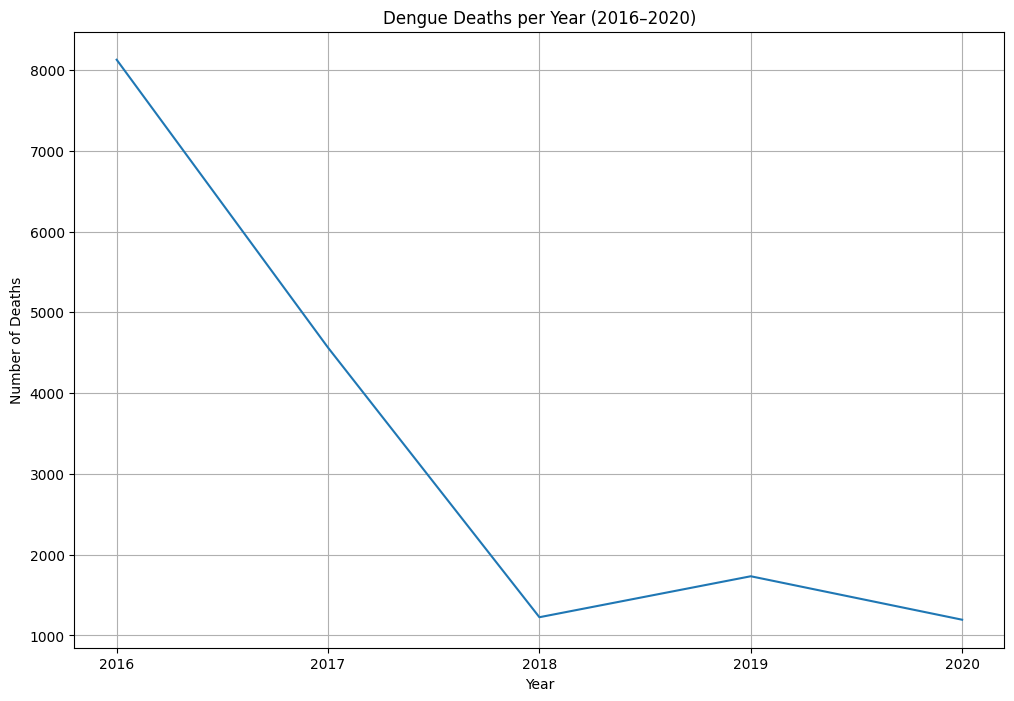

In [112]:
year_order = [2016, 2017, 2018, 2019, 2020]
dengue['Year'] = pd.Categorical(dengue['Year'], categories=year_order, ordered=True)

yearly_deaths = dengue.groupby(["Year"])["Dengue_Deaths"].sum()

yearly_deaths.plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,5), year_order)
plt.title("Dengue Deaths per Year (2016–2020)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()


<h4>INSIGHT: The <b>line graph</b> shows that the number of deaths from dengue has <b>changed a lot</b> over the years. In <b>2016</b>, there were a lot of deaths, with more than <b>8,000 cases</b> across the country. But after that year, the number <b>dropped quickly</b>, and by <b>2018</b>, the number of dengue deaths was at its <b>lowest point in the given time period</b>. This big drop could mean that <b>government programs and health campaigns</b> during those years were better at controlling dengue and getting the word out to the public. In <b>2019</b>, there was a small rise again, which shows that dengue is still a <b>health problem</b> that keeps coming back, especially during the rainy season when mosquitoes breed more.However, by <b>2020</b>, the number of deaths <b>went down once more</b>, possibly because of the <b>pandemic restrictions</b> that limited outdoor movement and gatherings, which may have also reduced dengue exposure.</h4>

<hr>

<h3>2.) Which regions have the highest case fatality rate (Deaths/Cases)?</h3>

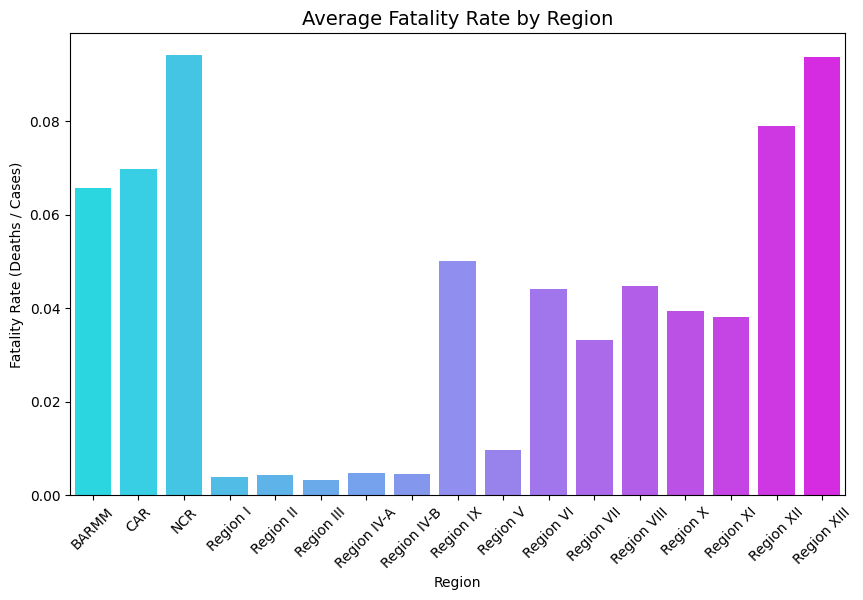

In [95]:
dengue['Fatality_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
region_fatality = dengue.groupby('Region')['Fatality_Rate'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_fatality, x='Region', y='Fatality_Rate', palette='cool')
plt.title('Average Fatality Rate by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Fatality Rate (Deaths / Cases)')
plt.xticks(rotation=45)
plt.show()


<h4>INSIGHT: The chart shows that <b>Region XIII, Region XII</b>, and <b>NCR</b> have the <b>highest dengue fatality rates</b>. This means these areas face more severe dengue cases or may have <b>limited access to quick medical care</b>. On the other hand, regions like <b>Region I</b> and <b>Region IV-A</b> have <b>lower fatality rates</b>, showing better response and treatment efforts. Strengthening healthcare support in high-fatality regions could help reduce dengue deaths.</h4>

<hr>

<h3>3.) Which months show the most dengue cases per region?</h3>

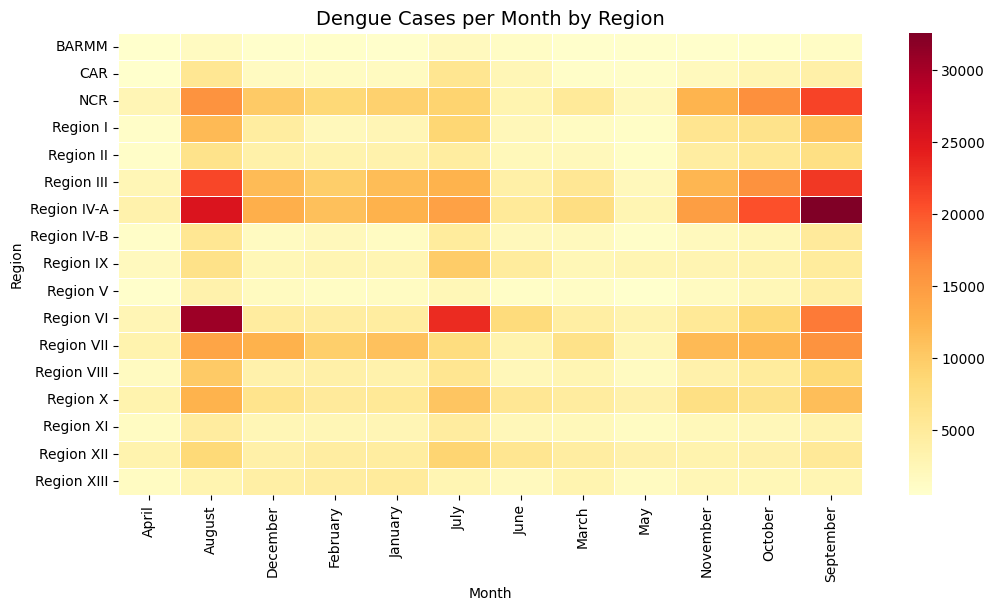

In [98]:
pivot_cases = dengue.pivot_table(values='Dengue_Cases', index='Region', columns='Month', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_cases, cmap='YlOrRd', linewidths=0.5, annot=False)
plt.title('Dengue Cases per Month by Region', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()


<h4>INSIGHT: The heatmap reveals that <b>Regions III, IV-A, and VI</b> recorded the <b>highest number of dengue cases</b>, especially during the months of <b>August to October</b>. These regions experienced intense outbreaks during the rainy season, when mosquito breeding conditions are at their peak.<br><br>Areas like <b>BARMM, CAR</b>, and <b>Region XII</b> had noticeably <b>lower dengue cases</b> throughout the year. This trend suggests that <b>weather patterns and population density</b> may play a crucial role in the spread of dengue. Strengthening <b>vector control programs</b> and <b>community awareness</b> during these high-risk months could help minimize future outbreaks.</h4>

<hr>

<h3>4.) What is the ratio between dengue deaths and cases per month?</h3>

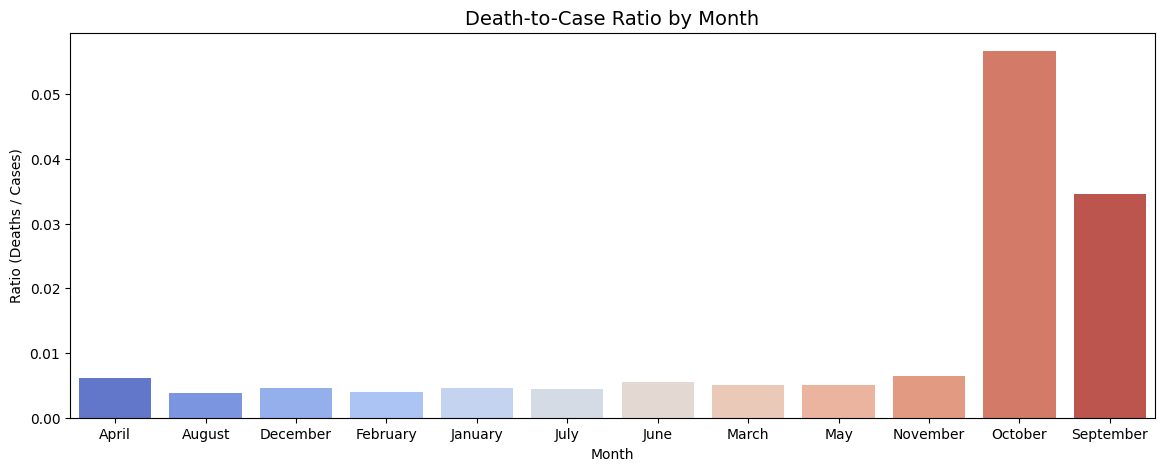

In [104]:
ratio_month = dengue.groupby('Month')[['Dengue_Cases','Dengue_Deaths']].sum()
ratio_month['Death_to_Case_Ratio'] = ratio_month['Dengue_Deaths'] / ratio_month['Dengue_Cases']
ratio_month = ratio_month.reset_index()

plt.figure(figsize=(14,5))
sns.barplot(data=ratio_month, x='Month', y='Death_to_Case_Ratio', palette='coolwarm')
plt.title('Death-to-Case Ratio by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Ratio (Deaths / Cases)')
plt.show()


<h4>INSIGHT: The analysis shows that October recorded the <b>highest death-to-case ratio</b>, followed by <b>September</b>, indicating that these months had a greater proportion of dengue deaths compared to cases. This could be due to <b>delayed treatment, peak mosquito activity</b>, or <b>overwhelmed healthcare systems</b> during the height of the dengue season.<br><br>Months like <b>January, February</b>, and <b>April</b> had a much <b>lower ratio</b>, suggesting fewer fatalities relative to the number of cases. This trend highlights the need for <b>early preventive measures and stronger health monitoring</b> before the peak months to reduce fatal outcomes.</h4>

<hr>

<h3>5.) Which regions contribute most to national dengue totals?</h3>

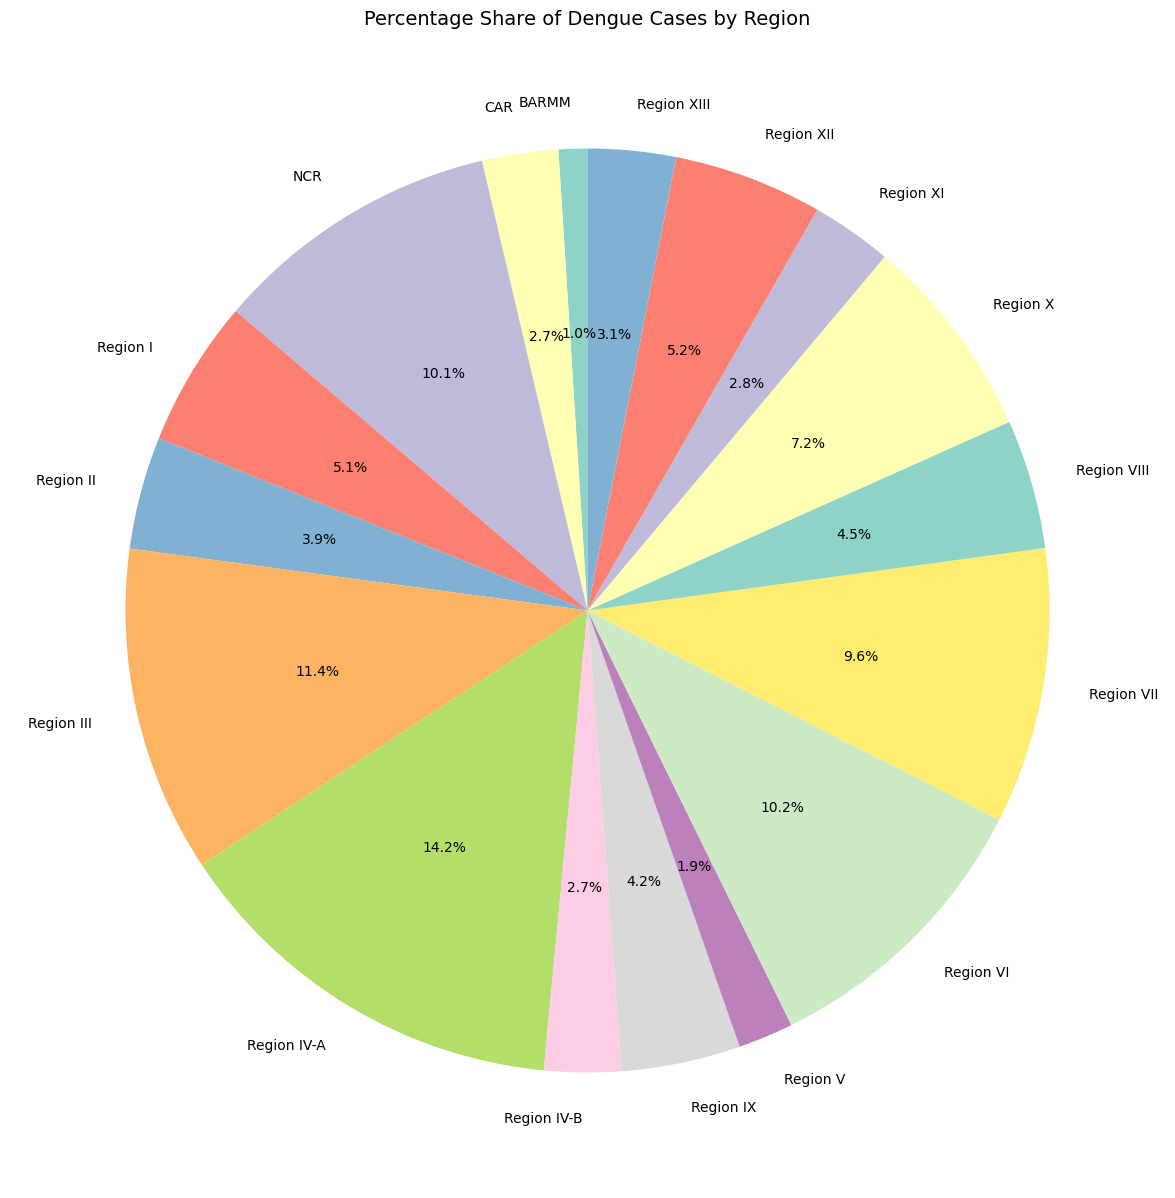

In [107]:
region_total = dengue.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(15,15))
plt.pie(region_total, labels=region_total.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Percentage Share of Dengue Cases by Region', fontsize=14)
plt.show()


<h4>INSIGHT: <b>Region IV-A (14.2%)</b>, <b>Region III (11.4%)</b>, and <b>Region VI (10.2%)</b> have the <b>most cases of dengue</b>. Region IV-A had the most cases, with more than one-tenth of the national total. Region III and Region VI were close behind. <b>Region II (3.9%)</b> and <b>Region IX (1.9%)</b> had the <b>fewest cases of dengue</b>. This means that <b>most cases of dengue are in Southern and Central Luzon</b>, which could mean that there are more people living there and better conditions for mosquitoes to breed. Dengue prevention and control efforts should focus on these <b>high-risk areas</b> while keeping an eye on other areas to stop more outbreaks from happening.</h4>

<hr>

<h3>6.) Which year recorded the most dengue cases?</h3>

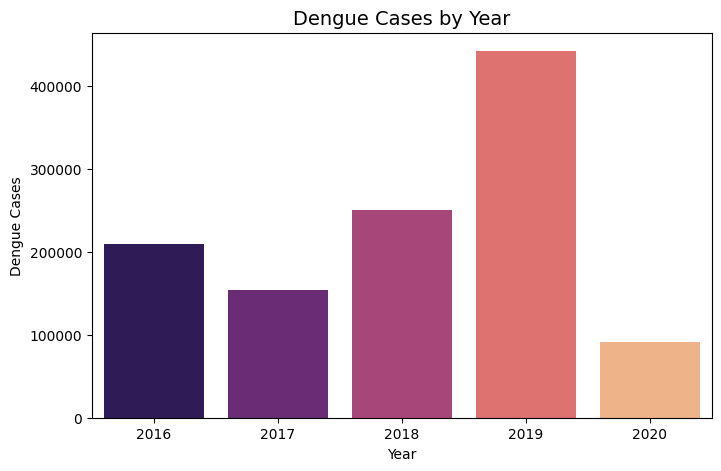

In [110]:
plt.figure(figsize=(8,5))
sns.barplot(data=dengue, x='Year', y='Dengue_Cases', estimator=sum, ci=None, palette='magma')
plt.title('Dengue Cases by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.show()


<h4>INSIGHT: The data reveals that <b>2019</b> recorded the <b>highest number of dengue cases</b>, reaching over <b>400,000 cases</b> , a significant spike compared to the previous years. This sharp increase suggests that 2019 experienced a severe dengue outbreak, possibly due to <b>climatic conditions, poor sanitation</b>, or <b>increased mosquito activity</b>.<br><br>Meanwhile, a noticeable <b>decline in 2020</b> may be attributed to <b>enhanced public health measures</b> and <b>pandemic-related restrictions</b>, which may have also reduced mosquito transmission. Overall, the trend highlights the importance of <b>sustained dengue prevention and control efforts</b>, especially during outbreak-prone years.</h4>

<hr>

<h3>7.) How correlated are dengue cases and deaths?</h3>

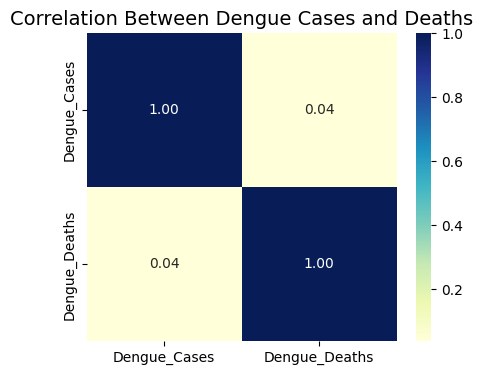

In [123]:
plt.figure(figsize=(5,4))
sns.heatmap(dengue[['Dengue_Cases','Dengue_Deaths']].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Between Dengue Cases and Deaths', fontsize=14)
plt.show()


<h4>INSIGHT: The correlation between <b>dengue cases </b>and <b>dengue deaths</b> is <b>very low (0.04)</b>, indicating that an increase in dengue cases does <b>not necessarily lead to a proportional increase</b> in deaths. This suggests that while dengue infections may rise, the number of fatalities remains relatively stable, possibly due to <b>improved healthcare response, early detection, and effective treatment</b> strategies.</h4>

<hr>

<h3>8.) Which regions have the highest average dengue deaths per 1,000 cases?</h3>

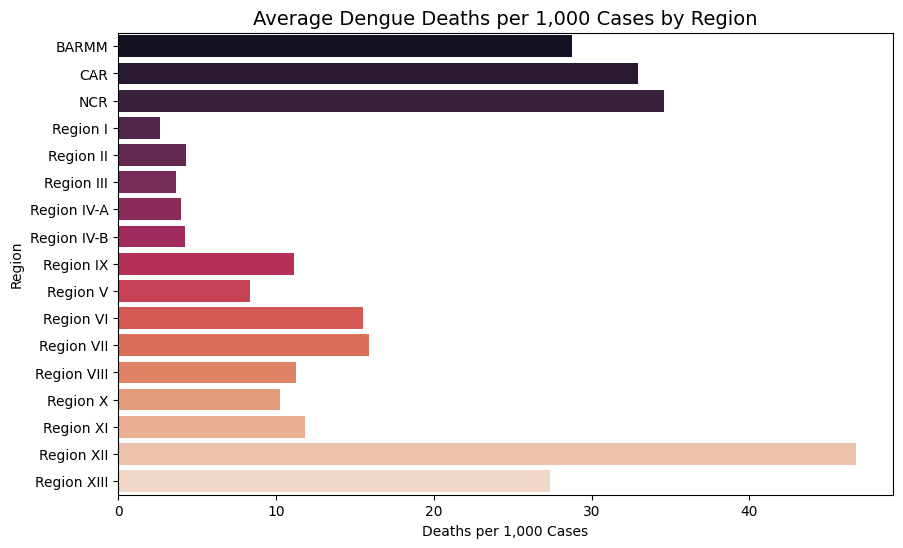

In [124]:
region_rate = dengue.groupby('Region')[['Dengue_Cases','Dengue_Deaths']].sum()
region_rate['Deaths_per_1000'] = (region_rate['Dengue_Deaths'] / region_rate['Dengue_Cases']) * 1000
region_rate = region_rate.reset_index().sort_values('Deaths_per_1000', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=region_rate, y='Region', x='Deaths_per_1000', palette='rocket')
plt.title('Average Dengue Deaths per 1,000 Cases by Region', fontsize=14)
plt.xlabel('Deaths per 1,000 Cases')
plt.ylabel('Region')
plt.show()

<h4>INSIGHT: Based on the bar graph, <b>Region XIII, NCR</b>, and <b>BARMM</b> recorded the <b>highest average dengue deaths per 1,000 cases</b>, showing that these areas experienced more severe dengue outcomes compared to other regions. This could be linked to <b>limited access to healthcare, late detection</b>, or <b>insufficient dengue prevention programs</b>.<br><br>Meanwhile, regions such as <b>Region I, Region II</b>, and <b>Region III</b> have <b>lower death rates</b>, which suggests that these areas may have <b>better healthcare facilities, stronger community awareness</b>, or <b>faster medical response</b> when dengue cases occur.</h4>

<hr>

<h3>9.) Which regions show increasing or decreasing dengue trends over time?</h3>

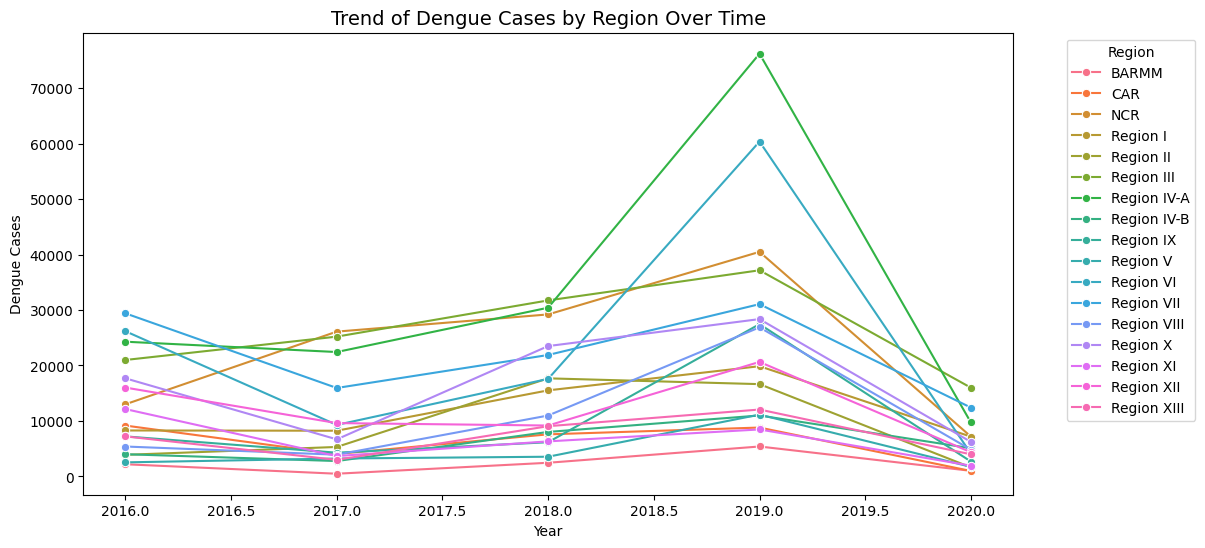

In [139]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dengue, x='Year', y='Dengue_Cases', hue='Region', estimator=sum, ci=None, marker='o')
plt.title('Trend of Dengue Cases by Region Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h4>INSIGHT: From 2016 to 2020, <b>Region IV-A, NCR (National Capital Region)</b>, and <b>Region III</b> had the <b>most dengue cases</b>. In 2019, <b>Region IV-A</b> had the most cases, with about <b>78,000</b>, which was the <b>highest outbreak ever recorded</b> in the country.  <b>NCR</b> also reported almost <b>60,000 cases</b>, and <b>Region III</b> came in second with about <b>40,000 cases</b> during the same time.<br><br>This big jump in <b>2019</b> could mean that there was a <b>dengue epidemic across the country</b>. After that, there was a clear drop in <b>2020</b>, which could have been caused by stricter <b>public health measures</b> and <b>restrictions due to the pandemic</b>.<br><br>At the same time, areas like <b>BARMM, CAR</b>, and <b>Region XIII</b> had case numbers that <b>stayed low and stable</b>, which could mean that the disease was better controlled or that fewer people were exposed to it.</h4>

<hr>

<h3>10.) Which month contributes the most cases each year?</h3>

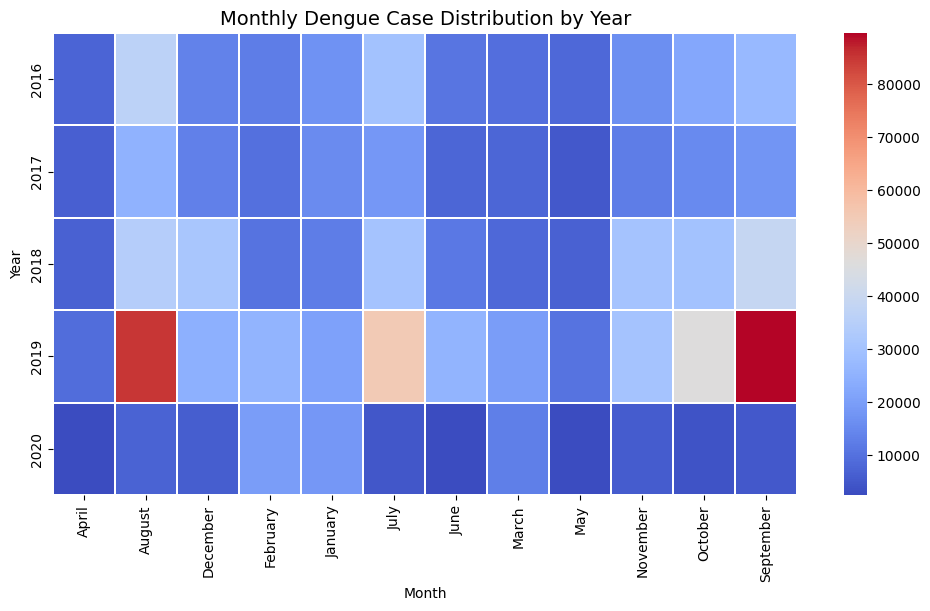

In [140]:
pivot_year_month = dengue.pivot_table(values='Dengue_Cases', index='Year', columns='Month', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_year_month, cmap='coolwarm', linewidths=0.3, annot=False)
plt.title('Monthly Dengue Case Distribution by Year', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

<h4>INSIGHT: The heatmap shows that <b>August</b> and <b>September</b> always have the <b>most dengue cases</b>, especially in <b>2019</b>. This trend suggests that dengue <b>spreads the most during the rainy season</b>, when there are more places for mosquitoes to breed. Concentrated prevention initiatives during these months may aid in diminishing the incidence of cases.</h4>

<hr>